## Mental Health Data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Seasons_Stats.csv')

In [2]:
df

,ID,Sal,yearname,Year,Player,Pos,Age,Tm,TmChg,G,...,Ftperc,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,9108.0,NaN,1989 Kareem Abdul-Jabbar,1989.000000,Kareem Abdul-Jabbar*,C,41.0,LAL,0.0,74.0,...,0.739,103.0,231.0,334.0,74.0,38.0,85.0,95.0,196.0,748.0
1,9109.0,NaN,1989 Mark Acres,1989.000000,Mark Acres,C,26.0,BOS,0.0,62.0,...,0.542,59.0,87.0,146.0,19.0,19.0,6.0,23.0,94.0,137.0
2,9110.0,NaN,1989 Michael Adams,1989.000000,Michael Adams,PG,26.0,DEN,0.0,77.0,...,0.819,71.0,212.0,283.0,490.0,166.0,11.0,180.0,149.0,1424.0
3,9111.0,NaN,1989 Mark Aguirre,1989.000000,Mark Aguirre,SF,29.0,TOT,1.0,80.0,...,0.733,146.0,240.0,386.0,278.0,45.0,36.0,208.0,229.0,1511.0
4,9114.0,NaN,1989 Danny Ainge,1989.000000,Danny Ainge,PG,29.0,TOT,1.0,73.0,...,0.854,71.0,184.0,255.0,402.0,93.0,8.0,145.0,186.0,1281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

ID               float64
Sal              float64
yearname          object
Year             float64
Player            object
Pos               object
Age              float64
Tm                object
TmChg            float64
G                float64
GS               float64
MP               float64
PER              float64
TSperc           float64
ThreePAr         float64
FTr              float64
ORBperc          float64
DRBperc          float64
TRBperc          float64
ASTperc          float64
STLperc          float64
BLKperc          float64
TOVperc          float64
USGperc          float64
OWS              float64
DWS              float64
WS               float64
WS_fortyeight    float64
OBPM             float64
DBPM             float64
BPM              float64
VORP             float64
FG               float64
FGA              float64
Fgperc           float64
threeP           float64
threePA          float64
threePperc       float64
twoP             float64
twoPA            float64


# Visualization

### Scatter Plots

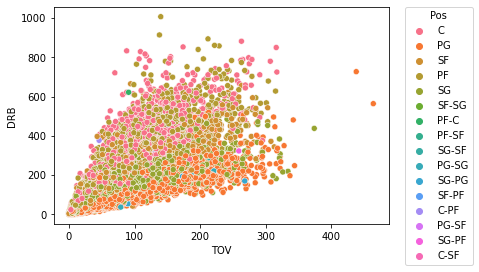

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, y="DRB", x="TOV", hue='Pos')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Pos")

## Create new variables

In [8]:
df['Happy'] = ['Not_Happy' if i<df['Happiness_Score'].quantile(.33) else ('Neutral' if i<=df['Happiness_Score'].quantile(.67) else 'Happy') for i in df['Happiness_Score']]

In [9]:
df['Rich'] = ['Poor' if i<df['Economy_(GDP_per_Capita)'].quantile(.33) else ('Neutral' if i<=df['Economy_(GDP_per_Capita)'].quantile(.67) else 'Rich') for i in df['Economy_(GDP_per_Capita)']]

In [10]:
df.dtypes

Country                                           object
Current_Health_Expenditures_(Percent_ of_GDP)    float64
Happiness_Rank                                   float64
Happiness_Score                                  float64
Lower_Confidence_Interval                        float64
Upper_Confidence_Interval                        float64
Economy_(GDP_per_Capita)                         float64
Family                                           float64
Health_(Life_Expectancy)                         float64
Freedom                                          float64
Trust_(Government_Corruption)                    float64
Generosity                                       float64
Dystopia_Residual                                float64
Age_Standarized_Suicide_Rate                     float64
Mental _hospitals                                float64
health_units                                     float64
outpatient _facilities                           float64
Psychiatrists                  

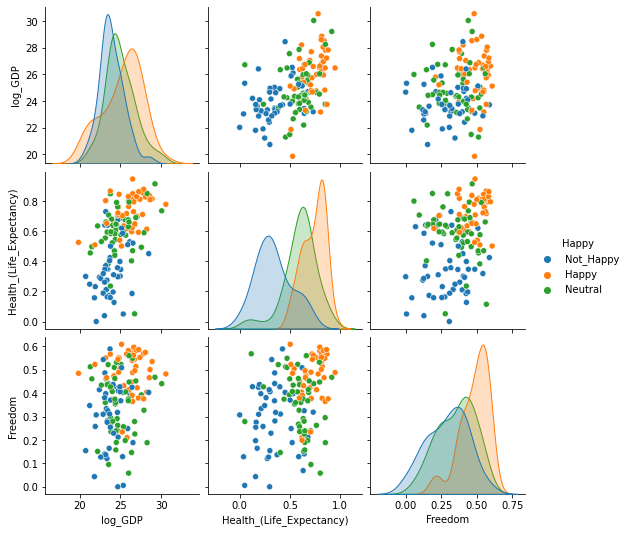

In [11]:
df1 = df[['log_GDP', 'Population','Health_(Life_Expectancy)', 'Freedom','Happy']]
sns.pairplot(df1, hue="Happy")

## Boxplots

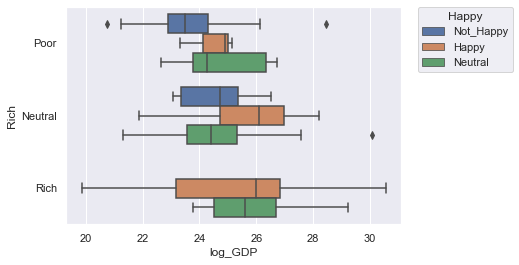

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme()
ax = sns.boxplot(x="log_GDP", y='Rich',data=df, hue='Happy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Happy")

## Distribution Plots

<AxesSubplot:xlabel='Happiness_Score', ylabel='Density'>

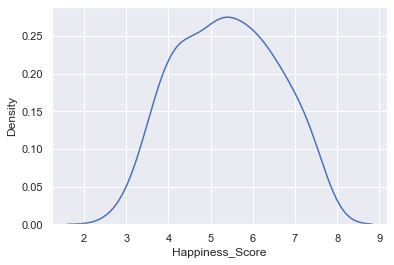

In [13]:
sns.kdeplot(x = 'Happiness_Score', data=df)

<AxesSubplot:xlabel='log_GDP', ylabel='Density'>

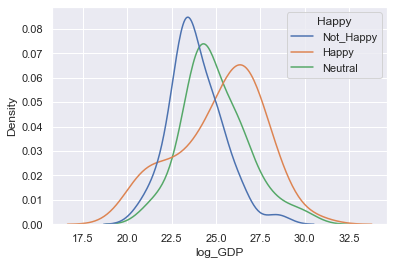

In [14]:
sns.kdeplot(x = 'log_GDP', hue = 'Happy', data=df)

In [15]:
import seaborn as sns
sns.__version__


'0.11.1'